# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_boston
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, 
                                  n_estimators=10, 
                                  max_samples=.5, # train 데이터 중 램덤 샘플링할 퍼센트 설정
                                  max_features=.5)

In [6]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0018512725830078125 (+/- 0.0007146157485045112)
avg score time: 0.002921772003173828 (+/- 0.0009646814920722977)
avg test score: 0.96 (+/- 0.024944382578492935)


In [7]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01544499397277832 (+/- 0.0028879157988714365)
avg score time: 0.005751800537109375 (+/- 0.00013357224233447236)
avg test score: 0.9666666666666668 (+/- 0.029814239699997188)


##### 와인 데이터

In [8]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [9]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0016820430755615234 (+/- 0.0013186261339866315)
avg score time: 0.0019272804260253907 (+/- 0.00035650906718305363)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [10]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.014288616180419923 (+/- 0.00045296112734744535)
avg score time: 0.0059893131256103516 (+/- 0.00011533083218227582)
avg test score: 0.9493650793650794 (+/- 0.021392680112801845)


##### 유방암 데이터

In [11]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [12]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0018970012664794923 (+/- 0.00039079150245311387)
avg score time: 0.006085348129272461 (+/- 0.0008608290041350538)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [13]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.016567754745483398 (+/- 0.001088945892856226)
avg score time: 0.012293529510498048 (+/- 0.00033998126232674225)
avg test score: 0.9648657040832169 (+/- 0.007794161028914468)


#### SVC

##### 붓꽃 데이터

In [14]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [15]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0014469146728515625 (+/- 0.00042082956441125363)
avg score time: 0.0004817962646484375 (+/- 0.00016034342704732225)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [16]:

cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020968198776245117 (+/- 0.0012536936964643705)
avg score time: 0.0024678707122802734 (+/- 7.872002382195934e-05)
avg test score: 0.9199999999999999 (+/- 0.05416025603090639)


##### 와인 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [18]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.001957273483276367 (+/- 0.0005231825835063467)
avg score time: 0.0006283760070800781 (+/- 0.00016351180711891627)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [19]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02551102638244629 (+/- 0.004628941013586911)
avg score time: 0.0027806758880615234 (+/- 0.00014649730429114902)
avg test score: 0.9607936507936508 (+/- 0.02206634673778671)


##### 유방암 데이터

In [20]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [21]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.005540800094604492 (+/- 0.001872863293480731)
avg score time: 0.001054239273071289 (+/- 9.92639827417259e-05)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [22]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.029901456832885743 (+/- 0.001112724314752952)
avg score time: 0.006809663772583008 (+/- 0.0020440227534587506)
avg test score: 0.9613103555348548 (+/- 0.010651425346375082)


#### Decision Tree

##### 붓꽃 데이터

In [23]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [24]:
cross_val = cross_validate(
    estimator = base_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0010798454284667968 (+/- 0.00036373535373124076)
avg score time: 0.0003804683685302734 (+/- 0.00010772588316552112)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [25]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01880803108215332 (+/- 0.001536864185316324)
avg score time: 0.0017427921295166016 (+/- 2.4079285025250636e-05)
avg test score: 0.9466666666666667 (+/- 0.04521553322083511)


##### 와인 데이터

In [26]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [27]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0017854690551757813 (+/- 0.0005845869810624685)
avg score time: 0.0003930568695068359 (+/- 0.00011368137872974362)
avg test score: 0.8931746031746032 (+/- 0.06919178527403315)


In [28]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.020069122314453125 (+/- 0.0010000659804015283)
avg score time: 0.0018918037414550782 (+/- 3.150533506768184e-05)
avg test score: 0.9220634920634921 (+/- 0.0641874616597038)


##### 유방암 데이터

In [29]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [30]:
cross_val = cross_validate(
    estimator = base_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.007765865325927735 (+/- 0.0015256909657011732)
avg score time: 0.0005064010620117188 (+/- 0.00017669754067274198)
avg test score: 0.9191274646793977 (+/- 0.016249641110591035)


In [31]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.03135380744934082 (+/- 0.00310888479536921)
avg score time: 0.0024566173553466795 (+/- 0.0007212551500506923)
avg test score: 0.9525694767893185 (+/- 0.022570258072378904)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [32]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [33]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [34]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015635967254638671 (+/- 0.0005007296581996459)
avg score time: 0.002155971527099609 (+/- 0.0003430705800059276)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [35]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01481471061706543 (+/- 0.0007810284156668935)
avg score time: 0.007840394973754883 (+/- 0.00013949316670953358)
avg test score: 0.4748227759919512 (+/- 0.15438396899468032)


##### 당뇨병 데이터

In [36]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [37]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0011420249938964844 (+/- 0.00040205949499523)
avg score time: 0.0017092227935791016 (+/- 0.000584150625195362)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [38]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.01562976837158203 (+/- 0.0015695503189862728)
avg score time: 0.007481288909912109 (+/- 6.747075607795613e-05)
avg test score: 0.414230261552896 (+/- 0.054495052644774146)


#### SVR

##### 보스턴 주택 가격 데이터

In [39]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [40]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.012943887710571289 (+/- 0.0011016853029870797)
avg score time: 0.0018219947814941406 (+/- 4.422417219906445e-05)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [41]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04004654884338379 (+/- 0.0020436280762476874)
avg score time: 0.0068699359893798825 (+/- 0.00013777801864418425)
avg test score: 0.2046037933165473 (+/- 0.298203273082452)


##### 당뇨병 데이터

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [43]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.008935308456420899 (+/- 0.001509841207279577)
avg score time: 0.0014133930206298828 (+/- 1.093652816163145e-05)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [44]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.037321853637695315 (+/- 0.009494709070748663)
avg score time: 0.005833578109741211 (+/- 0.00036385922893192714)
avg test score: 0.07113689643733631 (+/- 0.02499192715617944)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [46]:
cross_val = cross_validate(
    estimator = base_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.004201507568359375 (+/- 0.0014463638418279225)
avg score time: 0.0006184101104736329 (+/- 0.00023820139529676503)
avg test score: 0.25277462893258 (+/- 0.6713109451521081)


In [47]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.02731499671936035 (+/- 0.0064953396870017655)
avg score time: 0.0018899917602539062 (+/- 2.6393442829658426e-05)
avg test score: 0.41323059124759026 (+/- 0.347173427879789)


##### 당뇨병 데이터

In [48]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=.5, max_features=.5)

In [49]:
cross_val = cross_validate(
    estimator = base_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0012946128845214844 (+/- 0.00048777980127082284)
avg score time: 0.001829242706298828 (+/- 0.0006271860114234878)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [50]:
cross_val = cross_validate(
    estimator = bagging_model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.016156005859375 (+/- 0.002045907807739461)
avg score time: 0.007269096374511719 (+/- 0.00017995605659345778)
avg test score: 0.38332465282983524 (+/- 0.07786389483331045)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [51]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [52]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [53]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


avg fit time: 0.4527794361114502 (+/- 0.02780909409636436)
avg score time: 0.015602827072143555 (+/- 0.00186539962121651)
avg test score: 0.006792645556690501 (+/- 0.009078275644087822)


In [54]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11513810157775879 (+/- 0.007667090424926713)
avg score time: 0.006597661972045898 (+/- 0.00018732701758904433)
avg test score: 0.96 (+/- 0.024944382578492935)


In [55]:
cross_val = cross_validate(
    estimator = base_model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0015677928924560547 (+/- 0.0014298203101966317)
avg score time: 0.0009562969207763672 (+/- 3.4816297024855456e-05)
avg test score: 0.2833079963514746 (+/- 0.3484717614319225)


In [56]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


avg fit time: 0.4320541858673096 (+/- 0.009298120323529628)
avg score time: 0.01486220359802246 (+/- 0.00030804402310442494)
avg test score: 0.006818181818181818 (+/- 0.00909090909090909)


In [57]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


avg fit time: 0.4340511798858643 (+/- 0.007601164309037641)
avg score time: 0.015478372573852539 (+/- 0.001654062182289058)
avg test score: 0.006818181818181818 (+/- 0.00909090909090909)


In [58]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16942434310913085 (+/- 0.009735833480037724)
avg score time: 0.008097457885742187 (+/- 0.001377914376532533)
avg test score: 0.95960254618848 (+/- 0.025154373518961267)


### Random Forests 회귀

In [59]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [60]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26315979957580565 (+/- 0.0045380819325522275)
avg score time: 0.006459712982177734 (+/- 0.00015239561901344198)
avg test score: 0.6106242639789159 (+/- 0.20665566854598805)


In [61]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.22163825035095214 (+/- 0.003459949051744792)
avg score time: 0.015539455413818359 (+/- 0.017715019981137885)
avg test score: 0.4239471664594454 (+/- 0.044199939006994336)


### Extremely Randomized Trees 분류

In [62]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [63]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07964820861816406 (+/- 0.003885264437629996)
avg score time: 0.008010578155517579 (+/- 0.0024517287365971837)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [64]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08434157371520996 (+/- 0.0025006163088556123)
avg score time: 0.007569074630737305 (+/- 0.0007906165856558316)
avg test score: 0.9776190476190475 (+/- 0.01119469694127331)


In [65]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.0981823444366455 (+/- 0.0036835436051743135)
avg score time: 0.0076691627502441405 (+/- 0.0004324439947126872)
avg test score: 0.9648657040832168 (+/- 0.014650680934301576)


### Extremely Randomized Trees 회귀

In [66]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [67]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1567634105682373 (+/- 0.004867362160915992)
avg score time: 0.008600425720214844 (+/- 0.0033536873586204534)
avg test score: 0.634277028472476 (+/- 0.23938621819106065)


In [68]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.136460018157959 (+/- 0.00473753302874031)
avg score time: 0.006729841232299805 (+/- 0.00013529341620693004)
avg test score: 0.4254183431102139 (+/- 0.0394249570585284)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [69]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [70]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = .02
plot_step_coarser=.5
RANDOM_SEED = 13

In [71]:
iris=load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

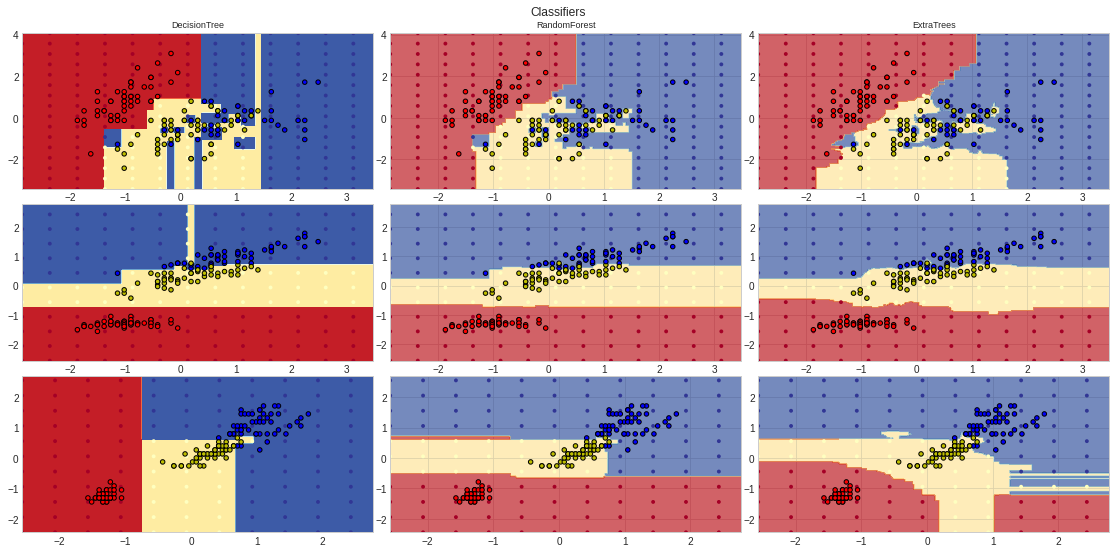

In [72]:
plt.figure(figsize=(16, 8))

for pair in ([0,1], [0,2], [2,3]):

  for model in models:

    X = iris.data[:, pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X, y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len('Classifier')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)
      
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z, cmap=cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
                            c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    
    plt.scatter(X[:, 0], X[:, 1], c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k', s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show()

In [73]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

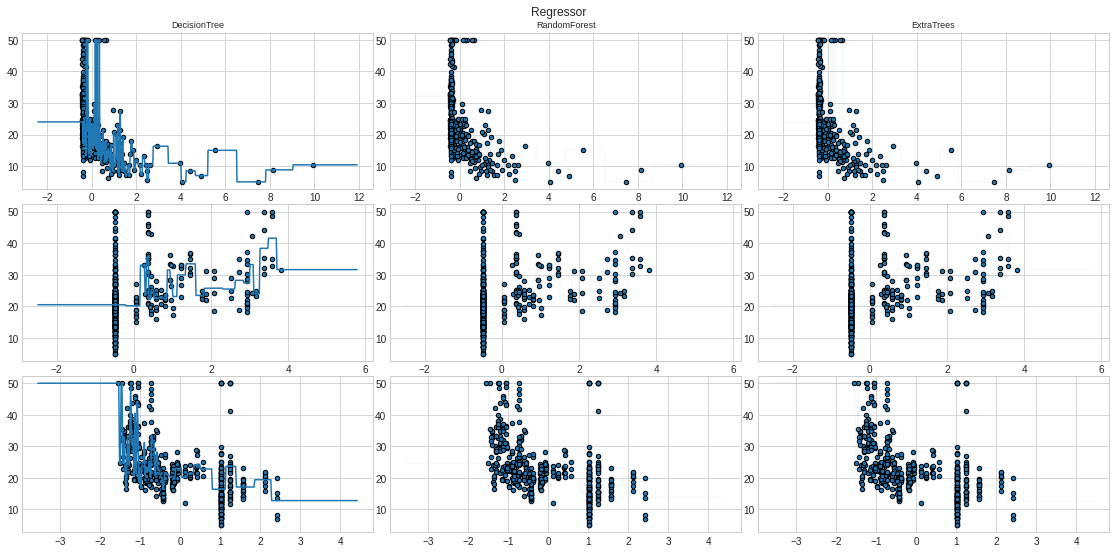

In [74]:
plt.figure(figsize=(16, 8))

for pair in (0,1,2):

  for model in models:

    X = boston.data[:, pair]
    y = boston.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    model.fit(X.reshape(-1, 1), y)

    model_title = str(type(model)).split(".")[-1][:-2][:-len('Regressor')]

    plt.subplot(3, 3, plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)
      
    x_min, x_max = X.min()-1, X.max() + 1
    y_min, y_max = X.min()-1, X.max() + 1
    xx, yy = np.arange(x_min-1, x_max+1, plot_step), np.arange(y_min-1, y_max+1, plot_step)
    
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z, alpha=estimator_alpha)
    
    plt.scatter(X, y, edgecolors='k', s=20)
    plot_idx += 1

plt.suptitle('Regressor', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=.2, w_pad=.2, pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [75]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor

### AdaBoost 분류

In [76]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [77]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06161618232727051 (+/- 0.0033803891847702674)
avg score time: 0.005678319931030273 (+/- 0.0002055356554746544)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


In [78]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06307220458984375 (+/- 0.0013456961251315865)
avg score time: 0.005423688888549804 (+/- 0.0002226670543378291)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


In [79]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.128814172744751 (+/- 0.002762129350173906)
avg score time: 0.008098268508911132 (+/- 0.0019740849680419687)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

In [80]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [81]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08045639991760253 (+/- 0.0036044810098384505)
avg score time: 0.003603553771972656 (+/- 0.00037889942662772233)
avg test score: 0.5985744583807469 (+/- 0.20937548598257683)


In [82]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.06831326484680175 (+/- 0.010834558403785196)
avg score time: 0.0030145645141601562 (+/- 0.0004135831636426454)
avg test score: 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [83]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [84]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [85]:
cross_val = cross_validate(
    estimator = model,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.16724777221679688 (+/- 0.02091597647708497)
avg score time: 0.0007715225219726562 (+/- 9.22605353801284e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


In [86]:
cross_val = cross_validate(
    estimator = model,
    X=wine.data, y = wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20381131172180175 (+/- 0.005440390254295329)
avg score time: 0.0008251190185546875 (+/- 5.591622757274405e-05)
avg test score: 0.9330158730158731 (+/- 0.04127777701479872)


In [87]:
cross_val = cross_validate(
    estimator = model,
    X=cancer.data, y = cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.36089272499084474 (+/- 0.004144050190050618)
avg score time: 0.0009293079376220704 (+/- 0.00027667612298994023)
avg test score: 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

In [88]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [89]:
cross_val = cross_validate(
    estimator = model,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10705800056457519 (+/- 0.0021345082348478654)
avg score time: 0.0007737159729003906 (+/- 3.6191720421566654e-05)
avg test score: 0.6752372690883461 (+/- 0.16121836382662494)


In [90]:
cross_val = cross_validate(
    estimator = model,
    X=diabetes.data, y = diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07998600006103515 (+/- 0.002262156053536223)
avg score time: 0.0009248733520507812 (+/- 0.0002128254847756958)
avg test score: 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [91]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score

In [92]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'hard'
)

In [93]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


In [94]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc', model1), ('naive', model2), ('forest', model3)],
    voting = 'soft',
    weights=[2,1,2]
)

In [95]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [97]:
X = iris.data[:, [0, 2]]
y = iris.target

In [98]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('dt', model1), ('knn', model2), ('svc', model3)],
                                          voting='soft', weights=[2,1,2])
model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [99]:
x_min, x_max = X.min()-1, X.max() + 1
y_min, y_max = X.min()-1, X.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

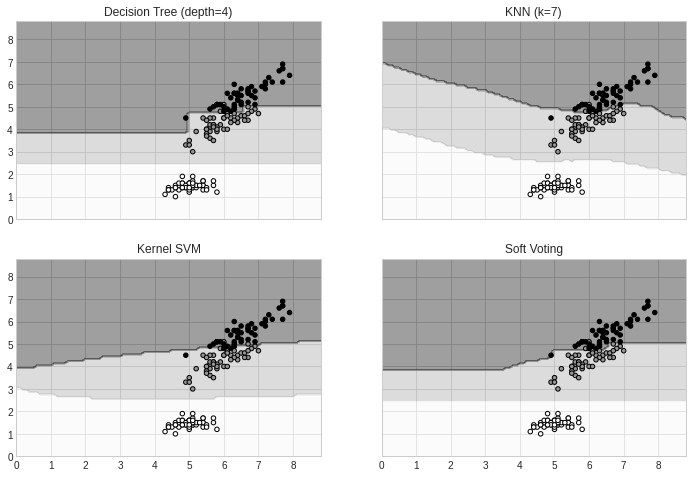

In [100]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           "Kernel SVM", 'Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [101]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [102]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

In [103]:
for model in (model1, model2, model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print("R2: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), model_name))

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

In [104]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [105]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear', model1), ('gbr', model2), ('rfr', model3)],
    weights=[1,1,1]
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
vote_model = vote_model.fit(X, y)

In [106]:
x_min, x_max = X.min()-1, X.max() + 1
xx= np.arange(x_min-1, x_max+1, .1)

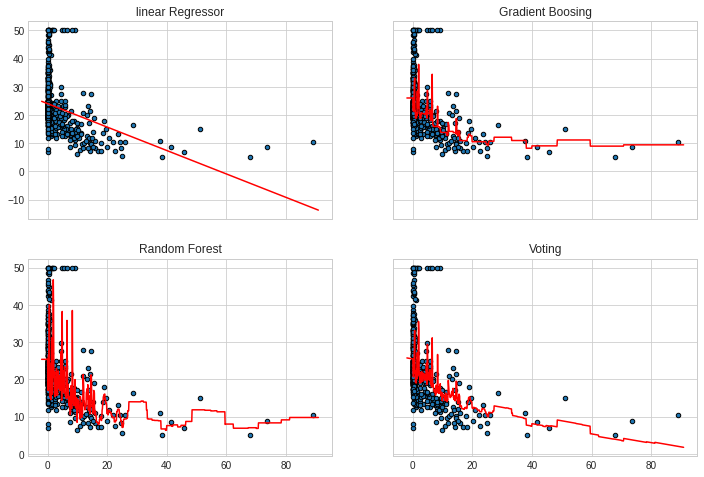

In [107]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['linear Regressor', 'Gradient Boosing', 'Random Forest', 'Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [108]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [109]:
estimators = [('ridge', Ridge()),
              ('lasso', Lasso()),
              ('svr', SVR())]

In [110]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor()
    )
)

In [111]:
cross_val = cross_validate(
    estimator = reg,
    X=boston.data, y = boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.12455005645751953 (+/- 0.005105152896217507)
avg score time: 0.002345418930053711 (+/- 4.0987641805797885e-05)
avg test score: 0.3193125598078287 (+/- 0.3328757426063098)


#### 회귀식 시각화

In [112]:
X = boston.data[:, 0].reshape(-1, 1)
y = boston.target

In [113]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators = estimators,
        final_estimator = GradientBoostingRegressor())

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
reg = reg.fit(X, y)

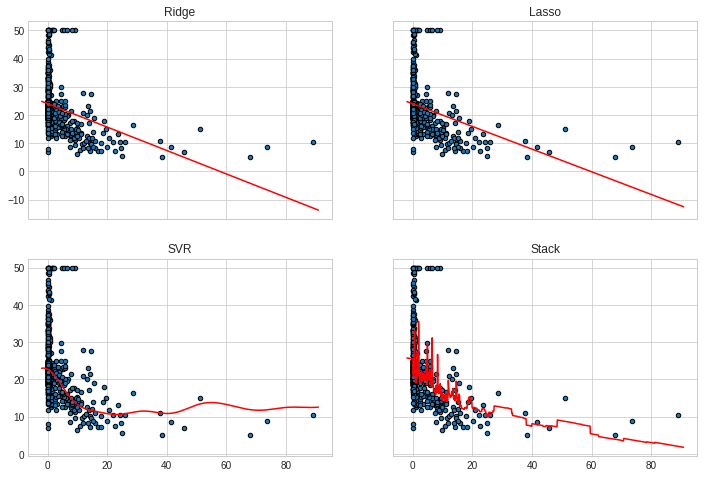

In [114]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso', 'SVR', 'Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx, Z, c='r')
  axarr[idx[0], idx[1]].scatter(X, y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [116]:
estimators = [('logistic', LogisticRegression(max_iter=10000)),
              ('svc', SVC()),
              ('navie', GaussianNB())]

In [117]:
clf = StackingClassifier(
        estimators = estimators,
        final_estimator = RandomForestClassifier()
    )

In [118]:
cross_val = cross_validate(
    estimator = clf,
    X=iris.data, y = iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.26986331939697267 (+/- 0.015300336742322576)
avg score time: 0.007259750366210937 (+/- 0.00017046488909624587)
avg test score: 0.96 (+/- 0.024944382578492935)


#### 결정 경계 시각화

In [119]:
X = iris.data[:, [0, 2]]
y = iris.target

In [120]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(
    estimators = estimators,
    final_estimator = RandomForestClassifier()
)

model1 = model1.fit(X, y)
model2 = model2.fit(X, y)
model3 = model3.fit(X, y)
stack = stack.fit(X, y)

In [121]:
x_min, x_max = X.min()-1, X.max() + 1
y_min, y_max = X.min()-1, X.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .1),
                   np.arange(y_min, y_max, .1))

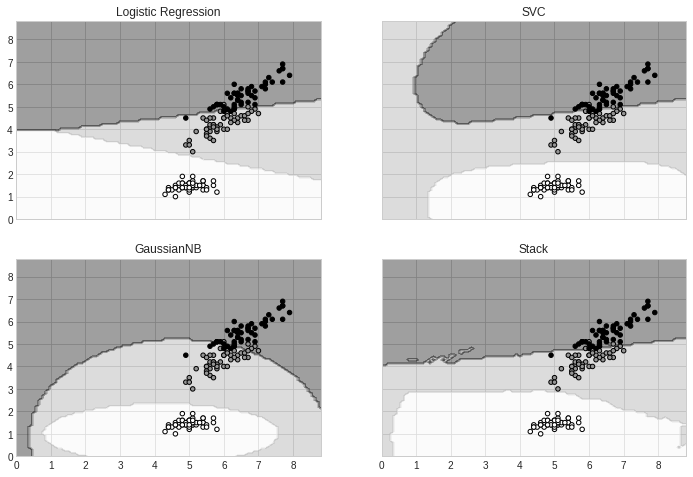

In [122]:
f, axarr = plt.subplots(2, 2, sharex = 'col', sharey='row', figsize=(12, 8))

for idx, model, tt in zip(product([0,1], [0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regression', 'SVC', "GaussianNB", 'Stack']):
  Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=.4)
  axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()